# Data Analysis Assignment 1
**Due Date:** November 22, 2024, 1:00 PM  
**Total Points:** 85 + upto 15 Bonus points

## Copyright and Fair Use

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

## Guidelines

1. **DO NOT add or delete any cells (or modify cell IDs)**
2. Complete code cells marked with `# YOUR CODE HERE`
3. Comment or remove lines with `raise NotImplementedError()`
4. For multiple choice questions, set variables to `True` or `False`
5. Run all cells before submission to verify your solutions
6. Submit Notebook (.ipynb file) on Moodle with filename using the correct format, e.g., **Assignment_1_ManuGupta_12345678.ipynb**. Replace 12345678 by your matriculation number.

## Plagiarism

Plagiarism checks will be conducted on all submissions.\
If any plagiarism is identified, all students involved will receive 0 points for the entire submission, pending further clarification.

In [1]:
# Imports cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set random seed for reproducibility
np.random.seed(42)

# Configure plots
# For more details on plotting styles, see visualization_styles notebook: https://github.com/ai-mg/Data-Analysis-Tutorials-Python-Jupyter
sns.set()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

The Intel Lab Data contains measurements from 54 sensors deployed in the Intel Berkeley Research laboratory. Each sensor (identified by moteid) measures:
- Temperature (°C)
- Humidity (%)
- Light (Lux)
- Voltage (V)

Dataset and further details:
- [Intel Lab Data](https://db.csail.mit.edu/labdata/labdata.html)

Raw data: **data.txt**\
Preprocessed data: **processed_sensor_data.csv**

First, let's load and examine the data:

In [3]:
# YOUR CODE HERE 
# Add your own preprocessing of the raw data (in data.txt file), to earn up to 15 bonus points.
# Or simply run the cell below and load the already preprocessed data.

df = pd.read_csv('data.txt', delimiter = " ")

df.dropna(inplace=True)

df = df.iloc[:, [0, 1, 3, 4, 5, 6, 7]] # Read in data: date, time, moteid, temperature, humidity, light, voltage

headers = ['date','time', 'moteid', 'temperature', 'humidity', 'light', 'voltage']

df.columns = headers # Set headers

df['date'] = df['date'].str.strip() # Removed whitespaces since I have to combine them so that it can be converted to_datetime
df['time'] = df['time'].str.strip()

df['datetime'] = df['date'].astype(str) + ' ' + df['time'].astype(str) # Combined to datetime


df.drop(['date', 'time'], axis=1, inplace=True) # Removed date and time, since no longer need them
df = df[['datetime'] + [col for col in df.columns if col != 'datetime']] # Since it was at the end, moved it to the first column


df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce') # Convert to datetime and all others to numeric
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce')
df['light'] = pd.to_numeric(df['light'], errors='coerce')
df['voltage'] = pd.to_numeric(df['voltage'], errors='coerce')
df['moteid'] = pd.to_numeric(df['moteid'], errors='coerce')

df.dropna(inplace=True) # Since errors = 'coerce' can cause NaN, in that case it removes them

q1 = df.quantile(0.25) # Create 25% and 75% quantile and calculate IQR to narrow down data
q3 = df.quantile(0.75)
IQR = q3 - q1


df = df[(df>= (q1 - 1.5 * IQR)) & (df <= (q3 + 1.5 * IQR ))] # Specified range, without outliers


df = df.iloc[1500000:1550000,:] # Just chose randomly

df.dropna(inplace=True) # Had some NaN values later, so just added it just in case

df.to_csv("processed_sensor_data.csv", index = False)

df.head()







,datetime,moteid,temperature,humidity,light,voltage
1573918,2004-03-18 04:11:19.134497,37.0,21.0664,44.0508,8.28,2.41431
1573922,2004-03-18 04:13:27.036016,37.0,21.0468,44.1172,8.28,2.41431
1573927,2004-03-18 04:15:15.170091,37.0,21.0370,44.0508,8.28,2.42416
1573931,2004-03-18 04:17:15.160782,37.0,21.0468,44.0508,8.28,2.41431
1573947,2004-03-18 04:25:45.265041,37.0,20.9880,44.2499,8.28,2.41431


In [4]:
# Nothing to do here; just run the cell
# Load the data
sensor_data = pd.read_csv('processed_sensor_data.csv')
# Documentation on pandas.read_csv function: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

print("Loaded processed data summary:")
print(f"Time range: {sensor_data['datetime'].min()} to {sensor_data['datetime'].max()}")
print(f"Number of records: {len(sensor_data):,}")
print(f"Number of sensors: {sensor_data['moteid'].nunique()}")

sensor_data.head()

Loaded processed data summary:
Time range: 2004-02-28 01:02:46.415714 to 2004-03-21 19:06:06.830024
Number of records: 33,244
Number of sensors: 2


,datetime,moteid,temperature,humidity,light,voltage
0,2004-03-18 04:11:19.134497,37.0,21.0664,44.0508,8.28,2.41431
1,2004-03-18 04:13:27.036016,37.0,21.0468,44.1172,8.28,2.41431
2,2004-03-18 04:15:15.170091,37.0,21.0370,44.0508,8.28,2.42416
3,2004-03-18 04:17:15.160782,37.0,21.0468,44.0508,8.28,2.41431
4,2004-03-18 04:25:45.265041,37.0,20.9880,44.2499,8.28,2.41431


## Task 1.1: Initial Data Analysis (10 points)

Create a function `calculate_column_stats` that calculates basic statistics for a single sensor measurement column.

Required Statistics:
- Mean: Average value
- Median: Middle value (50th percentile)
- Standard deviation: Measure of spread
- Minimum: Lowest value
- Maximum: Highest value
- Q1: First quartile (25th percentile)
- Q3: Third quartile (75th percentile)

Hint:
1. Your function should take a pandas Series (single column) as input:
   ```python
   def calculate_column_stats(column: pd.Series) -> dict:
       stats = column.describe()  # Gets basic statistics
       return {
           'mean': stats['mean'],
           'median': stats['50%'],
           ...
       }

**Note:**
1. Use the dictionary keys exactly as below (for grading purpose):

'mean', 'median', 'std', 'min', 'max', 'q1', 'q3'


In [5]:
def calculate_column_stats(column: pd.Series) -> dict:
    """Calculate basic statistics for a sensor measurement column.
    
    Parameters
    ----------
    column : pd.Series
        Single column of sensor measurements
        
    Returns
    -------
    dict
        Dictionary containing statistics:
        - mean: average value
        - median: 50th percentile
        - std: standard deviation
        - min: minimum value
        - max: maximum value
        - q1: 25th percentile
        - q3: 75th percentile
    """
    # YOUR CODE HERE
    return {
        'mean': column.mean(),
        'median': column.median(),
        'std': column.std(),
        'min': column.min(),
        'max': column.max(),
        'q1': column.quantile(0.25),
        'q3': column.quantile(0.75)
    }

    
    

In [6]:
# Test cell - visible basic tests
test_data = pd.Series([20, 21, 22, 23, 24])
test_stats = calculate_column_stats(test_data)


assert isinstance(test_stats, dict), "Function must return a dictionary"
assert all(key in test_stats for key in ['mean', 'median', 'std', 'min', 'max', 'q1', 'q3']), \
    "Missing required statistics"

In [7]:
# Calculate and display statistics for each measurement
print("Temperature Statistics:")
print("-" * 20)
temp_stats = calculate_column_stats(sensor_data['temperature'])
for stat, value in temp_stats.items():
    print(f"{stat:>6}: {value:.2f}")

print("\nHumidity Statistics:")
print("-" * 20)
humid_stats = calculate_column_stats(sensor_data['humidity'])
for stat, value in humid_stats.items():
    print(f"{stat:>6}: {value:.2f}")

print("\nLight Statistics:")
print("-" * 20)
light_stats = calculate_column_stats(sensor_data['light'])
for stat, value in light_stats.items():
    print(f"{stat:>6}: {value:.2f}")

print("\nVoltage Statistics:")
print("-" * 20)
voltage_stats = calculate_column_stats(sensor_data['voltage'])
for stat, value in voltage_stats.items():
    print(f"{stat:>6}: {value:.2f}")

Temperature Statistics:
--------------------
  mean: 21.91
median: 21.60
   std: 2.83
   min: 16.34
   max: 35.56
    q1: 20.07
    q3: 23.35

Humidity Statistics:
--------------------
  mean: 38.83
median: 39.69
   std: 5.29
   min: 20.00
   max: 51.35
    q1: 35.23
    q3: 42.85

Light Statistics:
--------------------
  mean: 326.88
median: 195.04
   std: 324.10
   min: 0.46
   max: 1258.56
    q1: 180.32
    q3: 412.16

Voltage Statistics:
--------------------
  mean: 2.55
median: 2.58
   std: 0.09
   min: 2.29
   max: 2.72
    q1: 2.47
    q3: 2.63


### Task 1.2: Data Visualization (20 points)

Create visualizations to explore the sensor data distributions. Your plots should show:
1. Distribution of each measurement (histogram) with smooth curves to identify patterns
2. Clear indication of thresholds for voltage levels
3. Proper labeling including units

Data Dictionary:
- temperature: Room temperature in °C (expected: 18-30°C)
- humidity: Relative humidity in % (expected: 20-80%)
- light: Illumination in Lux (expected: 0-1000 Lux)
- voltage: Battery voltage in V (optimal: >2.4V, critical: <2.2V)

Hints:
1. Create subplots using:
   ```python
   fig, axes = plt.subplots(2, 2, figsize=(15, 12))
   fig.suptitle('Sensor Measurements Distributions', fontsize=14)

2. For each measurement (using temperature as example):
   ```python
   # Get subplot
   ax = axes[0,0]
   
   # Create histogram
   ax.hist(data['temperature'], bins=50, density=True, alpha=0.7)
    
    # Add smooth curve
    counts, bins = np.histogram(data['temperature'], bins=50)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    ax.plot(bin_centers, counts/counts.sum(), 'r-', lw=2, 
           label='Distribution')

2. For voltage plot, add thresholds:
    ```Python
    ax = axes[1,1]
    # Plot histogram and curve as above

    # Add threshold lines
    ax.axvline(2.4, color='r', linestyle='--', 
          label='Warning (2.4V)')
    ax.axvline(2.2, color='darkred', linestyle='--', 
          label='Critical (2.2V)')
    ax.legend()

    plt.tight_layout()  # Adjust spacing between plots

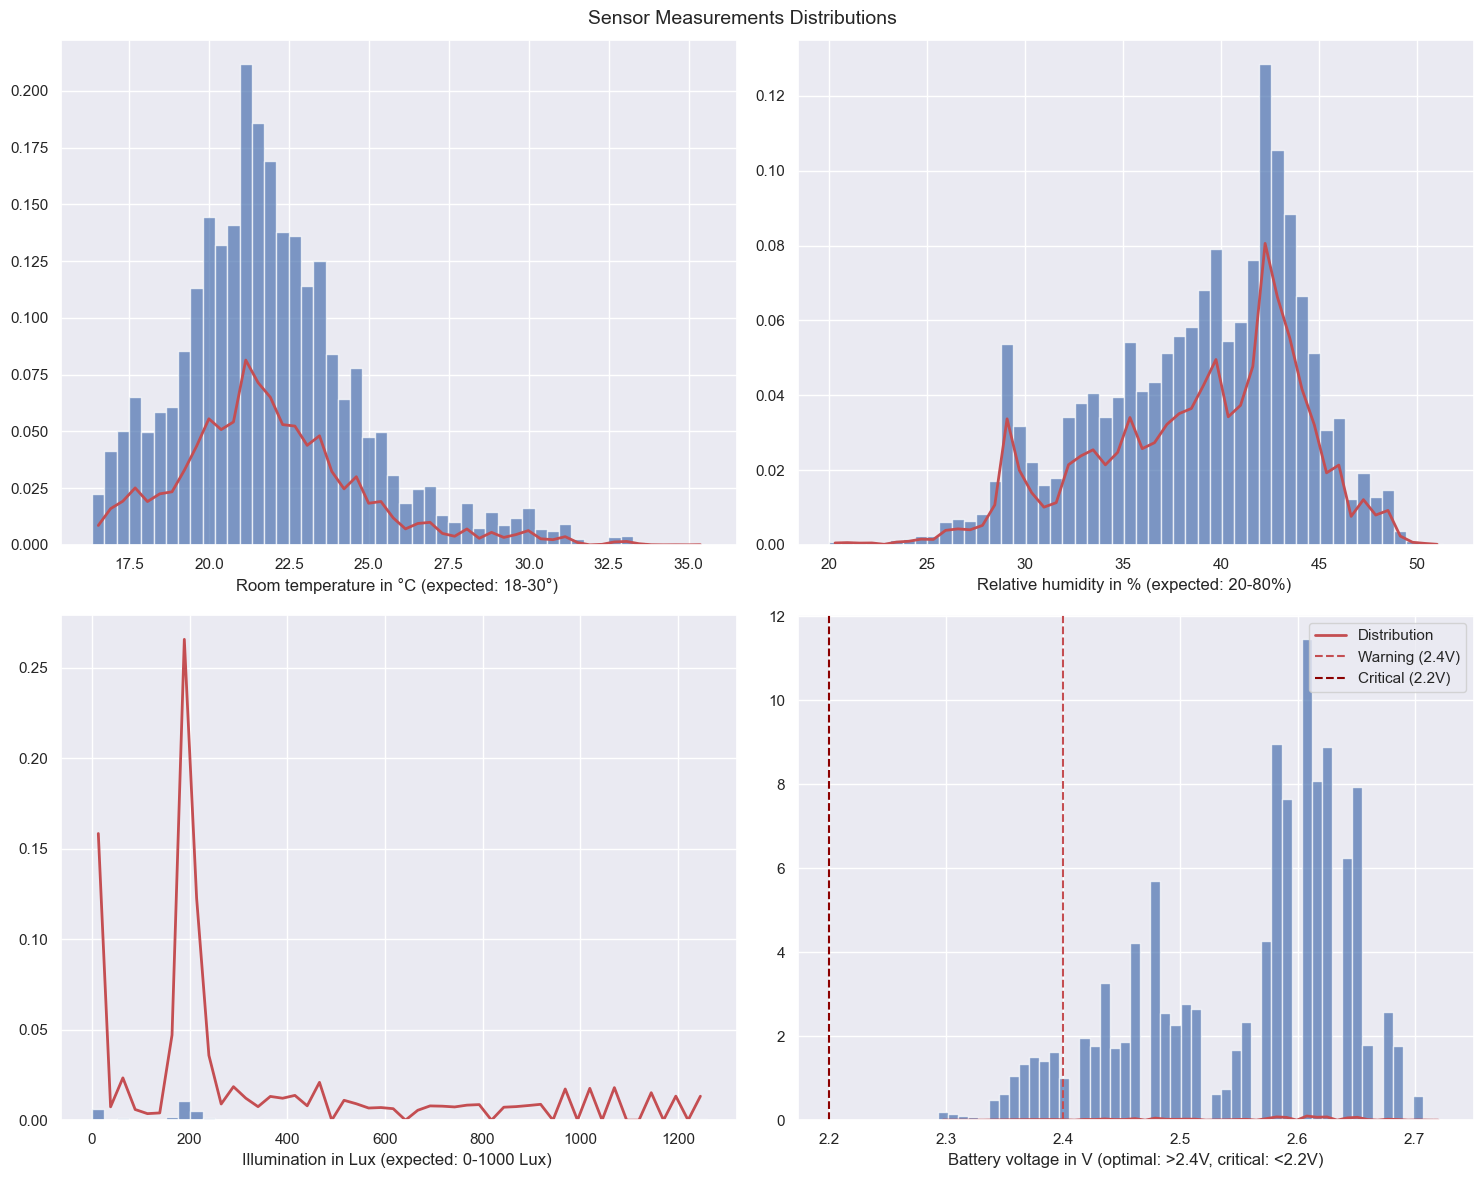

In [8]:
def create_distribution_plots(data: pd.DataFrame) -> plt.Figure:
    """Create distribution plots for all sensor measurements.
    
    Parameters
    ----------
    data : pd.DataFrame
        Sensor data
        
    Returns
    -------
    plt.Figure
        Figure containing the plots
    """
    # YOUR CODE HERE

    
    fig, axes = plt.subplots(2,2, figsize = (15, 12))
    fig.suptitle('Sensor Measurements Distributions', fontsize = 14)

    # Temperature

    ax = axes [0, 0]

    ax.hist(data['temperature'], bins = 50, density = True, alpha = 0.7)

    counts, bins = np.histogram(data['temperature'], bins = 50)
    bin_centers = (bins[:-1] + bins [1:]) / 2
    ax.plot(bin_centers, counts/counts.sum(), 'r-', lw = 2, label = 'Distribution')
    ax.set_xlabel('Room temperature in °C (expected: 18-30°) ')


     # Humidity

    ax = axes [0, 1]

    ax.hist(data['humidity'], bins = 50, density = True, alpha = 0.7)

    counts, bins = np.histogram(data['humidity'], bins = 50)
    bin_centers = (bins[:-1] + bins [1:]) / 2
    ax.plot(bin_centers, counts/counts.sum(), 'r-', lw = 2, label = 'Distribution')
    ax.set_xlabel('Relative humidity in % (expected: 20-80%) ')

     # Light

    ax = axes [1, 0]

    ax.hist(data['light'], bins = 50, density = True, alpha = 0.7)

    counts, bins = np.histogram(data['light'], bins = 50)
    bin_centers = (bins[:-1] + bins [1:]) / 2
    ax.plot(bin_centers, counts/counts.sum(), 'r-', lw = 2, label = 'Distribution')
    ax.set_xlabel('Illumination in Lux (expected: 0-1000 Lux) ')

     # Voltage

    ax = axes [1, 1]

    ax.hist(data['voltage'], bins = 50, density = True, alpha = 0.7)

    counts, bins = np.histogram(data['voltage'], bins = 50)
    bin_centers = (bins[:-1] + bins [1:]) / 2
    ax.plot(bin_centers, counts/counts.sum(), 'r-', lw = 2, label = 'Distribution')
    ax.set_xlabel('Battery voltage in V (optimal: >2.4V, critical: <2.2V)')
    ax.axvline(2.4, color='r', linestyle='--', 
          label='Warning (2.4V)')
    ax.axvline(2.2, color='darkred', linestyle='--', 
          label='Critical (2.2V)')
    ax.legend()

    plt.tight_layout()  # Adjust spacing between plots
    
    return fig


    

# Call function and show plots
fig = create_distribution_plots(sensor_data)
plt.show()

### Task 1.3: Data Distribution Analysis (10 points)

Based on your analysis of the temperature and voltage distributions, answer these questions by setting variables to `True` or `False`. Consider both the statistical patterns and their real-world implications.

1) Temperature Distribution Characteristics (5 points):\
   a_) Shows a normal (Gaussian) distribution\
   b_) Shows a uniform distribution\
   c_) Contains significant outliers\
   d_) Shows multiple distinct peaks (multi-modal)\
   e_) Main temperature peak is around 20-22°C (typical indoor temperature)

2) Voltage Characteristics (5 points):\
   f_) All sensors maintained good battery levels (>2.4V)\
   g_) Shows three distinct voltage clusters or modes\
   h_) Most readings are in optimal range (>2.4V)\
   i_) Shows evidence of battery depletion (<2.2V)\
   j_) Voltage distribution suggests sensor maintenance is needed

Example of how to answer:
```python
# Temperature characteristics
a_ = False  # Not normal - shows clear multi-modal pattern
b_ = False  # Not uniform - has distinct peaks
c_ = True   # Clear outliers present, especially in higher range
d_ = True   # Multiple peaks visible (around 20°C and 35-40°C)
e_ = True   # Main concentration around typical room temperature

# Voltage characteristics
f_ = False  # Many readings below warning threshold of 2.4V
g_ = True   # Clear clusters around 2.3V, 2.4V, and 2.7V
h_ = False  # Significant portion below optimal range
i_ = True   # Some readings below critical 2.2V threshold
j_ = True   # Pattern suggests battery replacement needed
```
Hint: Consider these aspects when analyzing the distributions:

1. Shape and modality (single peak vs multiple peaks)
2. Plot line curve on top of histogram to see peaks

Note: Your answers should be justified by patterns visible in the histograms. Think about what each distribution tells you about the sensor network's health and operation.

In [9]:
# YOUR CODE HERE
# Temperature characteristics
a_ = False # Looks like right skewed histogram, mean is also slightly higher than median
b_ = False # No uniform distribution, it is uni-modal
c_ = False # I guess there are some outlier around 32.5°C, but I wouldnt call them significant
d_ = False # It is uni-modal
e_ = True  # High peaks close to 22°C, also mean and median close to 22°C

# Voltage characteristics
f_ = False # Most of them did, but not all
g_ = False # From what i can see most significant clusters are between 2.4 and 2.5 and another one around 2.6, so not more than 2
h_ = True  # Highest peak appears around 2.6V and most of the data is around here
i_ = False # None of them are under 2.2V
j_ = False # Most of the voltage levels are above warning level, and all of them above critical level, so i would say maintenance not needed

In [10]:
# Test cell - DO NOT MODIFY
for var in ['a_', 'b_', 'c_', 'd_', 'e_', 'f_', 'g_', 'h_', 'i_', 'j_']:
    assert var in locals(), f"Missing answer for {var}"
    assert isinstance(locals()[var], bool), f"Answer for {var} must be True or False"

## Task 2.1: Daily Patterns Analysis (15 points)

In this task, you'll analyze how sensor measurements vary throughout the day.

Steps:
1. Extract hour from datetime column using `data['datetime'].dt.hour`
2. Group data by hour and calculate statistics
3. Return results in specified format

Hint: Use pandas groupby operations:
```python
# Example grouping by hour
hourly_means = data.groupby(data['datetime'].dt.hour)[column].mean()
```

In [11]:
def analyze_daily_pattern(data: pd.DataFrame, column: str) -> dict:
    """Analyze measurement patterns by hour of day.
    
    Parameters
    ----------
    data : pd.DataFrame
        Sensor data with 'datetime' column
    column : str
        Column to analyze ('temperature' or 'humidity')
    
    Returns
    -------
    dict
        Dictionary with hourly statistics:
        - 'hour_means': Mean values by hour
        - 'hour_stds': Standard deviations by hour
    """
    # Make a copy to avoid modifying original
    data = data.copy()
    
    # Convert datetime to datetime type if it's string
    if isinstance(data['datetime'].iloc[0], str):
        data['datetime'] = pd.to_datetime(data['datetime'])

    hourly_means = data.groupby(data['datetime'].dt.hour)[column].mean() # YOUR CODE HERE
    hourly_stds = data.groupby(data['datetime'].dt.hour)[column].std()# YOUR CODE HERE
    
    return {
        'hour_means': hourly_means.values,
        'hour_stds': hourly_stds.values
    }
  

In [12]:
# Test cell - DO NOT MODIFY
test_results = analyze_daily_pattern(sensor_data, 'temperature')

# Basic tests
assert isinstance(test_results, dict), "Function must return dictionary"
assert 'hour_means' in test_results, "Missing hourly means"
assert 'hour_stds' in test_results, "Missing hourly standard deviations"
assert len(test_results['hour_means']) == 24, "Should have 24 hourly values"

print("Basic tests passed!")

Basic tests passed!


## Task 2.2: Plot Daily Patterns (25 points)

Create a visualization showing how measurements vary throughout the day.

Requirements:
1. Line plot showing mean values by hour
2. Shaded region showing ±1 standard deviation
3. Proper labels and title
4. Legend explaining the shaded region

Hint:
- Call analyze_daily_pattern function
```python
# Example of plotting with confidence interval
plt.plot(hours, means, label='Mean')
plt.fill_between(hours, means-stds, means+stds, alpha=0.3, label='±1 std')
```

In [13]:
def plot_daily_pattern(data: pd.DataFrame, column: str) -> plt.Figure:
    """Create line plot showing daily pattern with confidence interval.
    
    Parameters
    ----------
    data : pd.DataFrame
        Sensor data
    column : str
        Column to plot
        
    Returns
    -------
    plt.Figure
        Figure with daily pattern plot
    """
    # YOUR CODE HERE
    
    result = analyze_daily_pattern(data, column)

    means = result['hour_means']
    stds = result['hour_stds']
    hours = range(24)
    
    fig, ax= plt.subplots()
    ax.plot(hours, means, label = 'Mean')
    ax.fill_between(hours, means-stds, means+stds, alpha = 0.3, label = '±1 Standard deviation')
    ax.set_xlabel('Hours of Day')
    ax.set_ylabel(column)
    ax.legend()
    ax.set_xticks(range(24)) # Couldnt see exactly so just increased
    
    return fig
   

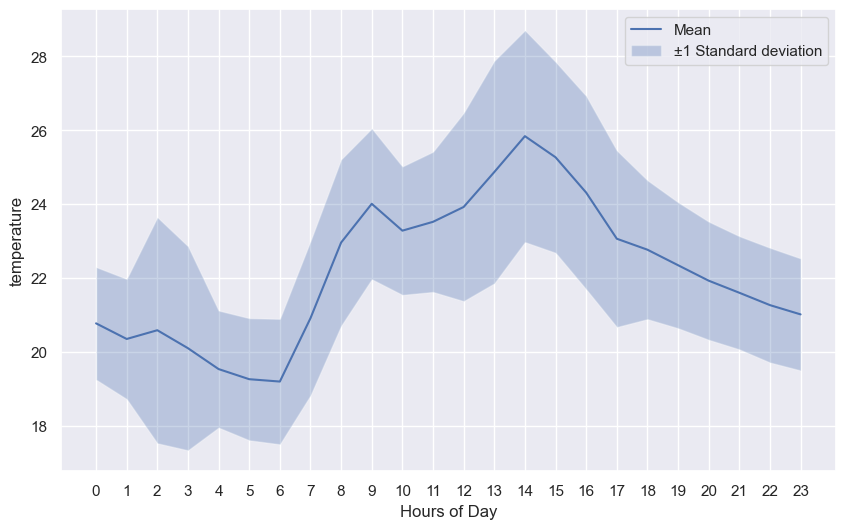

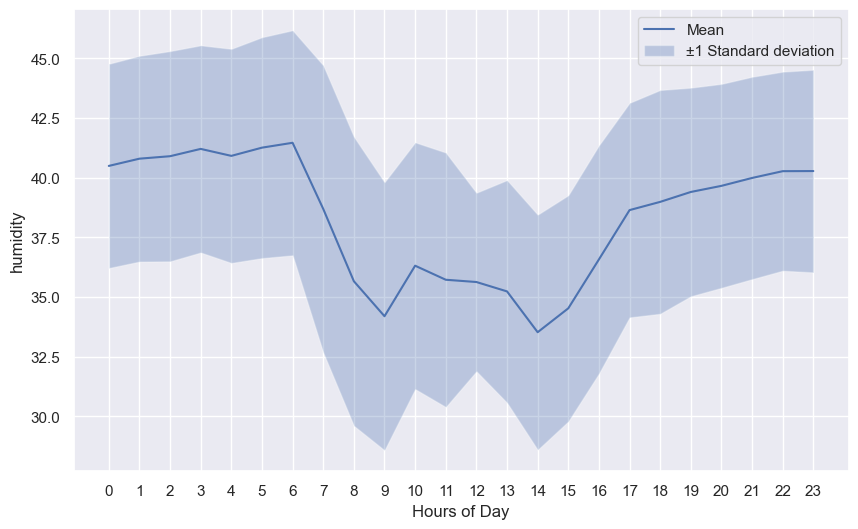

In [14]:
# Create plots for temperature and humidity

temp_fig = plot_daily_pattern(sensor_data, 'temperature')
humid_fig = plot_daily_pattern(sensor_data, 'humidity')

## Task 2.3: Temperature and Humidity Daily Patterns (5 points)

Based on your plots of daily temperature and humidity patterns (from Task 2.2), answer these questions:

Temperature patterns in the lab show:\
a_) Highest temperatures in early morning (6-9 AM)\
b_) Highest temperatures in afternoon (2-5 PM)\

Humidity patterns show:\
c_) Highest levels in early morning hours\
d_) Highest levels during afternoon\
e_) Relatively constant levels throughout day

Example of how to answer:
```python
# Temperature peaks (set exactly one to True)
a_ = False  # Early morning peak
b_ = True   # Afternoon peak
c_ = False  # Night peak

# Humidity pattern (set exactly one to True)
d_ = True   # Morning peaks
e_ = False  # Afternoon peaks

In [15]:
# YOUR CODE HERE


# Temperature
a_ = False # Peak is at around 14:00
b_ = True  # Highest would be between 14:00 and 16:00

# Humidity

c_ = True # Highest humidity is at 07:00
d_ = False # In the morning
e_ = False # Not really, have peaks in morning and evening, during hottest part of the day it is very low

In [16]:
# Test cell - DO NOT MODIFY
for var in ['a_', 'b_', 'c_', 'd_', 'e_']:
    assert var in locals(), f"Missing answer for {var}"
    assert isinstance(locals()[var], bool), f"Answer for {var} must be True or False"

In [17]:
# Do not create any new cells here